#          TRAVAIL PRATIQUE :  Mercredi 23 Mars 2022


##                        Refaire tous les TPs du livre donne en cours de la page 1 a 40

In [55]:
import numpy as np
import random as random
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import fetch_olivetti_faces

### Premier point : Matrice de confusion et Metrique d'evaluation d'algorithme de Machine learning

In [2]:
###                 MATRICE DE CONFUSION a 2 entrees
###
###
###                   Classes Predite
###
###                 *  *  *  *  *  *  *
###                 *        *        *
###                 *   VN   *    FP  *
###                 *        *        *
###   Classes reel  *  *  *  *  *  *  * 
###                 *        *        *
###                 *   FN   *    VP  *
###                 *        *        *
###                 *  *  *  *  *  *  *


###   Rappel = VP / (VP + FN + VN + FP)

###   Precision = VP / (VP + FP )

###   Accuracy = (VP + TP) / (VP + FP + VN + FN)

In [3]:
def performMConf(VP , VN , FP , FN):
    recall = VP / (VP + FN)
    precision = VP / (VP + FP)
    accuracy = (VP + VN ) /(VP + VN + FP + FN)
    f1_score = 2 * (precision * recall) / (precision + recall)
    perform = {
        'Recall' : recall ,
        'Precision' : precision ,
        'Accuracy' : accuracy ,
        'F1_score' : f1_score
    }
    return perform
    
    

In [4]:
def testEval(vn = 7 , t = 100):
    VN = vn
    print(" FN         FP         VP           VN    precision   accuracy     recall   f1_score")
    for FN in range(0 , 7):
        for FP in range(0 , FN + 1):
            VP = t - FP - FN - VN
            perform = performMConf(VP , VN , FP , FN)
            print("------------------------------------------------------------------------------------")
            print(f"{FN:4.2f}  -{FP:8.2f}  - {VP:8.2f}  - {VN:8.2f}", end="")
            print(f"{perform['Precision']:8.2f}  - {perform['Accuracy']:8.2f}  - {perform['Recall']:8.2f}  - {perform['F1_score']:8.2f}")

In [5]:
testEval()

 FN         FP         VP           VN    precision   accuracy     recall   f1_score
------------------------------------------------------------------------------------
0.00  -    0.00  -    93.00  -     7.00    1.00  -     1.00  -     1.00  -     1.00
------------------------------------------------------------------------------------
1.00  -    0.00  -    92.00  -     7.00    1.00  -     0.99  -     0.99  -     0.99
------------------------------------------------------------------------------------
1.00  -    1.00  -    91.00  -     7.00    0.99  -     0.98  -     0.99  -     0.99
------------------------------------------------------------------------------------
2.00  -    0.00  -    91.00  -     7.00    1.00  -     0.98  -     0.98  -     0.99
------------------------------------------------------------------------------------
2.00  -    1.00  -    90.00  -     7.00    0.99  -     0.97  -     0.98  -     0.98
----------------------------------------------------------------------

##### Importation du jeu de donnees iris

In [6]:
iris = load_iris()

##### Descriptions du jeux de donnees

In [7]:
# Attributs permettant de decrire le jeux de donnees
print()
print('Les attibuts permettant de decrire le jeux de donnees')

for i in iris.keys():
    print()
    print(f"- {i}")


Les attibuts permettant de decrire le jeux de donnees

- data

- target

- frame

- target_names

- DESCR

- feature_names

- filename

- data_module


In [8]:
## pour recuperer les attributs du jeux de donnees
print()
print('Les attibuts du  jeux de donnees')
for i in iris.feature_names:
    print()
    print(f"- {i}")
print()



Les attibuts du  jeux de donnees

- sepal length (cm)

- sepal width (cm)

- petal length (cm)

- petal width (cm)



In [9]:
# data contient la matrice de donnees
for i in iris.data:
    print(i)

[5.1 3.5 1.4 0.2]
[4.9 3.  1.4 0.2]
[4.7 3.2 1.3 0.2]
[4.6 3.1 1.5 0.2]
[5.  3.6 1.4 0.2]
[5.4 3.9 1.7 0.4]
[4.6 3.4 1.4 0.3]
[5.  3.4 1.5 0.2]
[4.4 2.9 1.4 0.2]
[4.9 3.1 1.5 0.1]
[5.4 3.7 1.5 0.2]
[4.8 3.4 1.6 0.2]
[4.8 3.  1.4 0.1]
[4.3 3.  1.1 0.1]
[5.8 4.  1.2 0.2]
[5.7 4.4 1.5 0.4]
[5.4 3.9 1.3 0.4]
[5.1 3.5 1.4 0.3]
[5.7 3.8 1.7 0.3]
[5.1 3.8 1.5 0.3]
[5.4 3.4 1.7 0.2]
[5.1 3.7 1.5 0.4]
[4.6 3.6 1.  0.2]
[5.1 3.3 1.7 0.5]
[4.8 3.4 1.9 0.2]
[5.  3.  1.6 0.2]
[5.  3.4 1.6 0.4]
[5.2 3.5 1.5 0.2]
[5.2 3.4 1.4 0.2]
[4.7 3.2 1.6 0.2]
[4.8 3.1 1.6 0.2]
[5.4 3.4 1.5 0.4]
[5.2 4.1 1.5 0.1]
[5.5 4.2 1.4 0.2]
[4.9 3.1 1.5 0.2]
[5.  3.2 1.2 0.2]
[5.5 3.5 1.3 0.2]
[4.9 3.6 1.4 0.1]
[4.4 3.  1.3 0.2]
[5.1 3.4 1.5 0.2]
[5.  3.5 1.3 0.3]
[4.5 2.3 1.3 0.3]
[4.4 3.2 1.3 0.2]
[5.  3.5 1.6 0.6]
[5.1 3.8 1.9 0.4]
[4.8 3.  1.4 0.3]
[5.1 3.8 1.6 0.2]
[4.6 3.2 1.4 0.2]
[5.3 3.7 1.5 0.2]
[5.  3.3 1.4 0.2]
[7.  3.2 4.7 1.4]
[6.4 3.2 4.5 1.5]
[6.9 3.1 4.9 1.5]
[5.5 2.3 4.  1.3]
[6.5 2.8 4.6 1.5]
[5.7 2.8 4

In [10]:
# target permet de representer les sorties du jeux de donnees : chaque sortit est representer par un nbre
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
# target name contient les sorties du jeux de donnees(les valeurs de la derniere case du jeux de donnees )
print()
print("Les classes predites dans le jeux de donnees sont les suivantes : ")
for i in iris.target_names:
    print()
    print(f" - {i}")
print()  



Les classes predites dans le jeux de donnees sont les suivantes : 

 - setosa

 - versicolor

 - virginica



In [12]:
## afficher le nombre de ligne et de collonne de la matrice de donnees

In [13]:
lignes, colonnes = iris.data.shape
print(f"la matrice de donnees a : {lignes} lignes et {colonnes} colonnes")

la matrice de donnees a : 150 lignes et 4 colonnes


In [14]:
###### Afficher les classes du jeux de donnees avec le nombre de lignes affectees

In [15]:
print("Classe et nombre de ligne affectees")
for classe , nbre in zip(iris.target_names , list(np.bincount(iris.target))):
    print()
    print(f"               - {classe} : {nbre}")

Classe et nombre de ligne affectees

               - setosa : 50

               - versicolor : 50

               - virginica : 50


### Histogramme du jeux de donnees 

/tmp/ipykernel_25277/2431731719.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


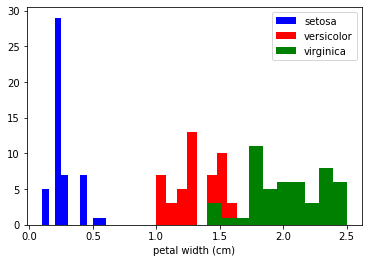

In [16]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
x_index = 3
colors = ['blue', 'red', 'green']
for label, color in zip(range(len(iris.target_names)), colors):#zib couple les elmts de deux tableaux un par un
    ax.hist(iris.data[iris.target==label, x_index],
    label=iris.target_names[label],
    color=color)
ax.set_xlabel(iris.feature_names[x_index])
ax.legend(loc='upper right')
fig.show()

### Nuage de points du jeux de donnees 

In [17]:
#### sepal length en fonction de petal width

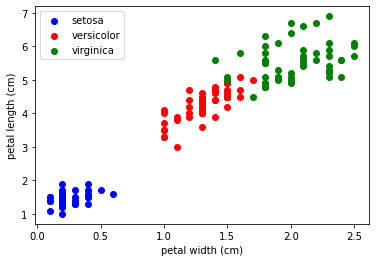

In [18]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
x_index = 3
y_index = 2
colors = ['blue', 'red', 'green']
for label, color in zip(range(len(iris.target_names)), colors):
    ax.scatter(iris.data[iris.target==label, x_index],
    iris.data[iris.target==label, y_index],
    label=iris.target_names[label],
    c=color)
ax.set_xlabel(iris.feature_names[x_index])
ax.set_ylabel(iris.feature_names[y_index])
ax.legend(loc='upper left')
plt.show()

In [19]:
## cherchons le x_index et y_index qui separe au mieux les les classes dans le cas precedent    

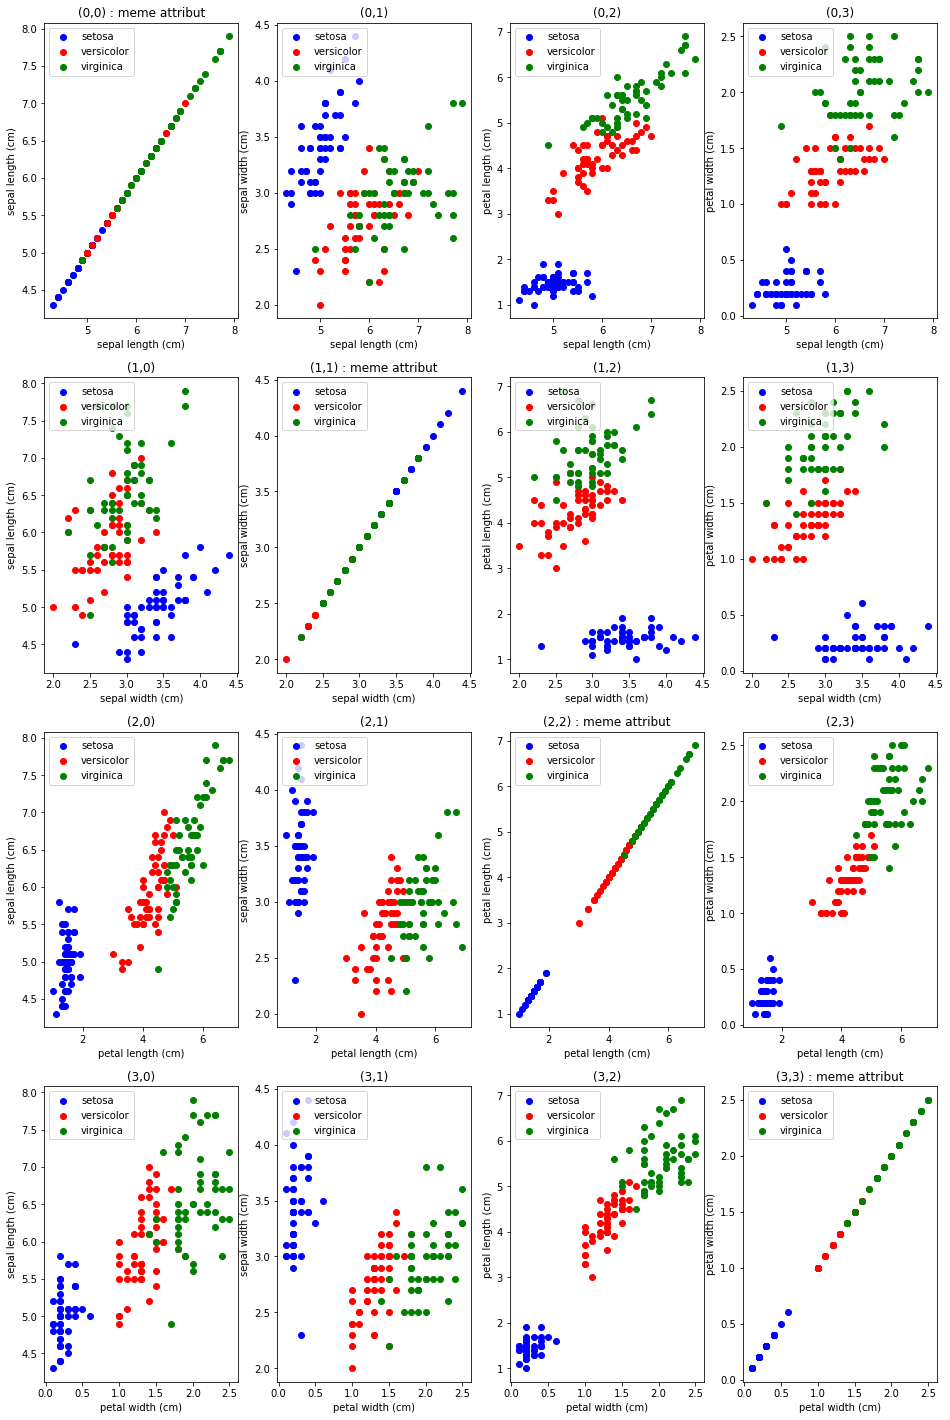

In [20]:
n = len(iris.feature_names)
fig, ax = plt.subplots(n, n, figsize=(16, 25))
colors = ['blue', 'red', 'green']
for x in range(n):
    for y in range(n):
        xname = iris.feature_names[x]
        yname = iris.feature_names[y]
        for color_ind in range(len(iris.target_names)):
            ax[x, y].scatter(iris.data[iris.target==color_ind,
            x],
            iris.data[iris.target==color_ind, y],
            label=iris.target_names[color_ind],
            c=colors[color_ind])
        ax[x, y].set_xlabel(xname)
        ax[x, y].set_ylabel(yname)
        if(x==y):
            ax[x,y].set_title(f"({x},{y}) : meme attribut")
        else:
            ax[x,y].set_title(f"({x},{y})")
       
        ax[x, y].legend(loc='upper left')
plt.show()

In [21]:
## le x et y qui separe au mieux les donnees est le couple (1,3)

### Matrice de nuage de points avec Pandas

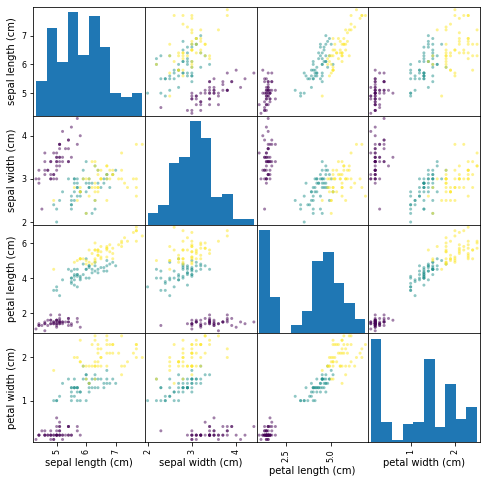

In [22]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
pd.plotting.scatter_matrix(iris_df,
c=iris.target,
figsize=(8, 8)
);

### Representation du jeux de donnees en 3D

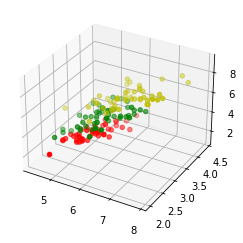

In [26]:
X = []
for iclass in range(3):
    X.append([[], [], []])
    for i in range(len(iris.data)):
        if iris.target[i] == iclass:
            X[iclass][0].append(iris.data[i][0])
            X[iclass][1].append(iris.data[i][1])
            X[iclass][2].append(sum(iris.data[i][2:]))
colours = ("r", "g", "y")
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for iclass in range(3):
    ax.scatter(X[iclass][0], X[iclass][1], X[iclass][2], c=colours[iclass])
plt.show()

# Nouveau jeux de donnees

In [27]:
from sklearn.datasets import load_digits
digits = load_digits()

##### Nombre de lignes et de colonnes

In [ ]:
n_samples, n_features = digits.data.shape
print((n_samples, n_features))

##### affichage du jex de donnees

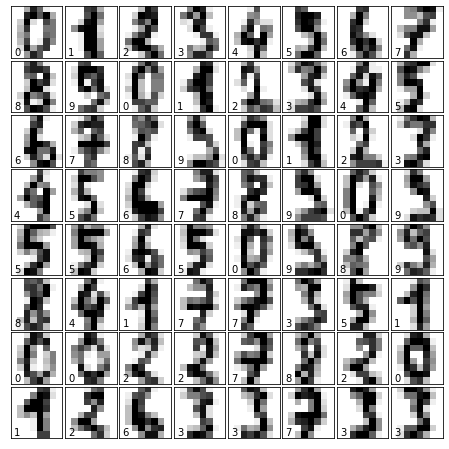

In [38]:
# set up the figure
fig = plt.figure(figsize=(6, 6)) # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label de l"image de sorti
    ax.text(0, 7, str(digits.target[i]))

In [35]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

## EXERCICES

### sklearn contient un "ensemble de données Wine".
#### • Rechercher et charger cet ensemble de données
#### • Pouvez-vous trouver une description ?
#### • Comment s'appellent les classes ?
#### • Quelles sont les fonctionnalités ?
#### • Où sont les données et les données étiquetées ?

### Reponse 1 :

In [39]:
from sklearn import datasets
wine = datasets.load_wine()

### Reponse 2 :

In [40]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

### Reponse 3 

In [42]:
print(wine.target_names)

['class_0' 'class_1' 'class_2']


### Reponse 4

In [43]:
print(wine.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


### Reponse 5

In [44]:
data = wine.data


In [47]:
for i in data :
    print (i)

[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
[1.32e+01 1.78e+00 2.14e+00 1.12e+01 1.00e+02 2.65e+00 2.76e+00 2.60e-01
 1.28e+00 4.38e+00 1.05e+00 3.40e+00 1.05e+03]
[1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
 3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
[1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
 2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
[1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
 3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]
[1.42e+01 1.76e+00 2.45e+00 1.52e+01 1.12e+02 3.27e+00 3.39e+00 3.40e-01
 1.97e+00 6.75e+00 1.05e+00 2.85e+00 1.45e+03]
[1.439e+01 1.870e+00 2.450e+00 1.460e+01 9.600e+01 2.500e+00 2.520e+00
 3.000e-01 1.980e+00 5.250e+00 1.020e+00 3.580e+00 1.290e+03]
[1.406e+01 2.150e+00 2.610e+00 1.760e+01 1.210e+02 2.600e+00 2.510e+00
 3.100e-01 1.250e+00 5.0

In [48]:
for i in labelled_data :
    print(i)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


## Exercice : Créer un nuage de points avec les attribut ash et color_intensity de l'ensemble de données wine.

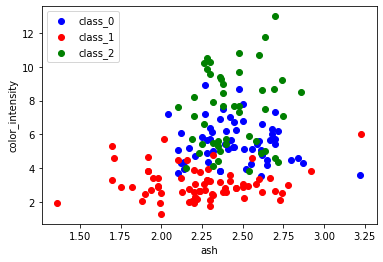

In [50]:
features = 'ash', 'color_intensity'
features_index = [wine.feature_names.index(features[0]),wine.feature_names.index(features[1])]
colors = ['blue', 'red', 'green']
for label, color in zip(range(len(wine.target_names)), colors):
    plt.scatter(wine.data[wine.target==label, features_index[0]],
    wine.data[wine.target==label, features_index[1]],
    label=wine.target_names[label],c=color)
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.legend(loc='upper left')
plt.show()

## EXERCICE : Créer une matrice de dispersion des caractéristiques de l'ensemble de données Wine

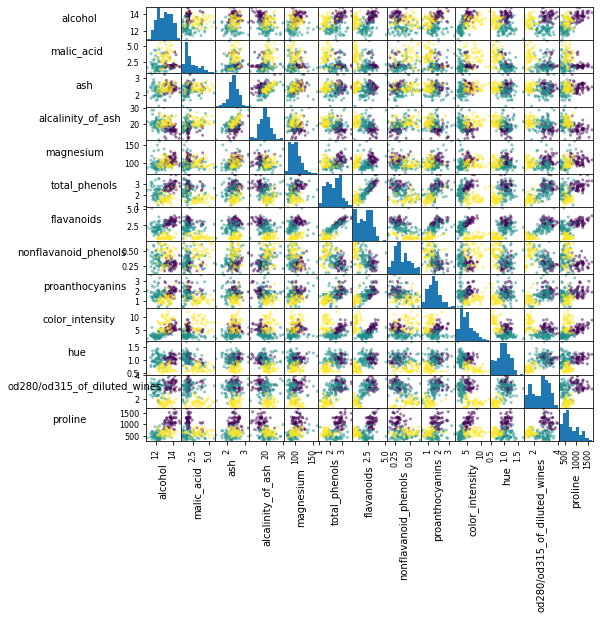

In [54]:
def rotate_labels(df, axes):
    """ On veux bien afficher les etiquetes sur la vue """
    n = len(df.columns)
    for x in range(n):
        for y in range(n):
        # recuperation des axe
            ax = axs[x, y]
            # on tourne les x verticalement
            ax.xaxis.label.set_rotation(90)
            # et les y horizontalement
            ax.yaxis.label.set_rotation(0)
            ax.yaxis.labelpad = 50
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
axs = pd.plotting.scatter_matrix(wine_df,c=wine.target,figsize=(8, 8),);
rotate_labels(wine_df, axs)

## Exercice : Récupérez le jeu de données des visages Olivetti et visualisez les visages.

In [57]:
# recuperations des visages
visage = fetch_olivetti_faces()

In [65]:
lignes, colonnes = visage.data.shape
print(f"nbre de lignes = {lignes},nbre de colonnes = {colonnes}")

nbre de lignes = 400,nbre de colonnes = 4096


In [63]:
len(visage.data)

400

### verification de la taille des images 

In [67]:
print(np.all(visage.images.reshape((400, 4096)) == visage.data))

True


### Affichage du jeux de donnees

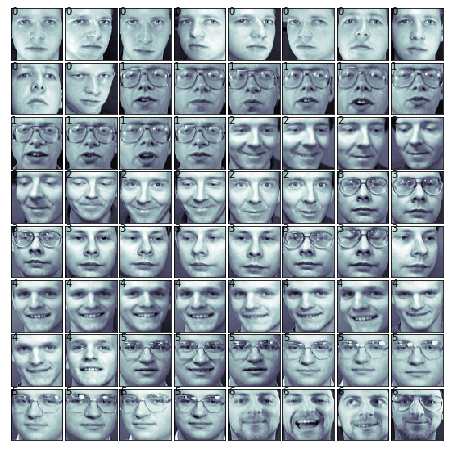

In [74]:
# set up the figure
fig = plt.figure(figsize=(6, 6)) # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
# affichage des digits : chaque image est 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(visage.images[i], cmap=plt.cm.bone, interpolation='nearest')
    # label de l'image avec valeur de sorti
    ax.text(0, 7, str(visage.target[i]))